## Исследование данных о российском кинопрокате



<div class="alert alert-info">
<b>Министерством культуры Российской Федерации предоставлены данные о рынке российского кинопроката для выявления текущих трендов. Уделим внимание фильмам, которые получили государственную поддержку и ответим на вопрос, насколько такие фильмы интересны зрителю. 
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(mkrf_movies, mkrf_shows)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [3]:
mkrf_movies.info()
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
mkrf_movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [5]:
mkrf_movies.isnull().sum()*100/len(mkrf_movies)

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  12.917446
genres                   13.037670
dtype: float64

In [6]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].str.strip()

for str in mkrf_movies['puNumber']:
    if str.isdigit() == False:
        print(str)

нет


In [7]:
mkrf_movies.drop(mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет'].index, inplace=True)

for str in mkrf_movies['puNumber']:
    if str.isdigit() == False:
        print(str)

In [8]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

<div class="alert alert-info">
<b>Добавим в таблицу mkrf_movies столбец 'box_office' из таблицы mkrf_shows.

In [9]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Предобработка данных

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['refundable_support'] = data['refundable_support'].fillna(0).astype('int')
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0).astype('int')
data['budget'] = data['budget'].fillna(0).astype('int')
data['financing_source'] = data['financing_source'].fillna('Другой')
data['producer'] = data['producer'].fillna('Другой')
data.loc[data['box_office'] == 'inf', 'box_office'] = ''
data = data.dropna(subset=['film_studio', 'director', 'production_country'])
data['director'] = data['director'].astype('str')
data['genres'] = data['genres'].astype('str')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   puNumber               7458 non-null   int64              
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               7458 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     7458 non-null   int64              
 10  nonrefundable_support  7458 non-null   int64              
 11  budget                 7458 non-null   int64            

<div class="alert alert-info">
<b>1)film_studio, director, production_country - пропуски удалил ввиду их немногочисленности.
    2)refundable_support; nonrefundable_support;budget - пропуски заменены на zero (0 будет означать, что фильм снят на деньги частных инвесторов)
    3)financing_source - заменил пропуски на "Другой" (для определения доли фильмов с господдержкой)
    4)ratings, genres - не все фильмы есть на Кинопоиске, пока оставляем.
    5)box_office - пропуски оставлены как есть

In [11]:
data.duplicated().sum()

0

<div class="alert alert-info">
<b> Явных дубликатов нет. </b> 
</div>

In [12]:
data[data['title'].duplicated()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0,0,0,Другой,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0,0,0,Другой,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0,0,0,Другой,8.2,"фэнтези,приключения,семейный",1125302.0


In [13]:
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,Другой,7.6,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,Другой,6.8,"комедия,криминал",NaN


<div class="alert alert-info">
<b> Наличие дубликатов- названий фильмов, возможно, обусловлено тем, что у одного фильма может быть несколько прокатных удостоверений. </b> 
</div>

In [14]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [15]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [16]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [17]:
data['financing_source'].str.split(',')
data['financing_source'].unique()

array(['Другой', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [18]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'nan', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,м

In [19]:
data['title'] = data['title'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['film_studio'] = data['film_studio'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()
data['age_restriction'] = data['age_restriction'].str.strip()
data['financing_source'] = data['financing_source'].str.strip()
data['ratings'] = data['ratings'].str.strip()
data['genres'] = data['genres'].str.split(',')

In [20]:
display(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Другой,7.2,"[боевик, драма, мелодрама]",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Другой,«6+» - для детей старше 6 лет,0,0,0,Другой,6.6,"[драма, военный]",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"[фантастика, боевик, триллер]",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"[фантастика, боевик, триллер]",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"[фантастика, боевик, триллер]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0,0,0,Другой,NaN,[nan],NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0,0,0,Другой,5.4,"[боевик, триллер]",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0,0,0,Другой,NaN,[nan],NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0,0,0,Другой,NaN,[nan],NaN


<div class="alert alert-info">
<b> В столбцах "жанр" и "источник финансирования" несколько типов категорий объединены в одну. Категории разделены для дальнейшей группировки.</b> 
</div>

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"[драма, мелодрама]",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,[nan],28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"[комедия, фантастика]",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,[драма],55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,[драма],232100.0


array([[<AxesSubplot:title={'center':'puNumber'}>,
        <AxesSubplot:title={'center':'show_start_date'}>],
       [<AxesSubplot:title={'center':'refundable_support'}>,
        <AxesSubplot:title={'center':'nonrefundable_support'}>],
       [<AxesSubplot:title={'center':'budget'}>, <AxesSubplot:>]],
      dtype=object)

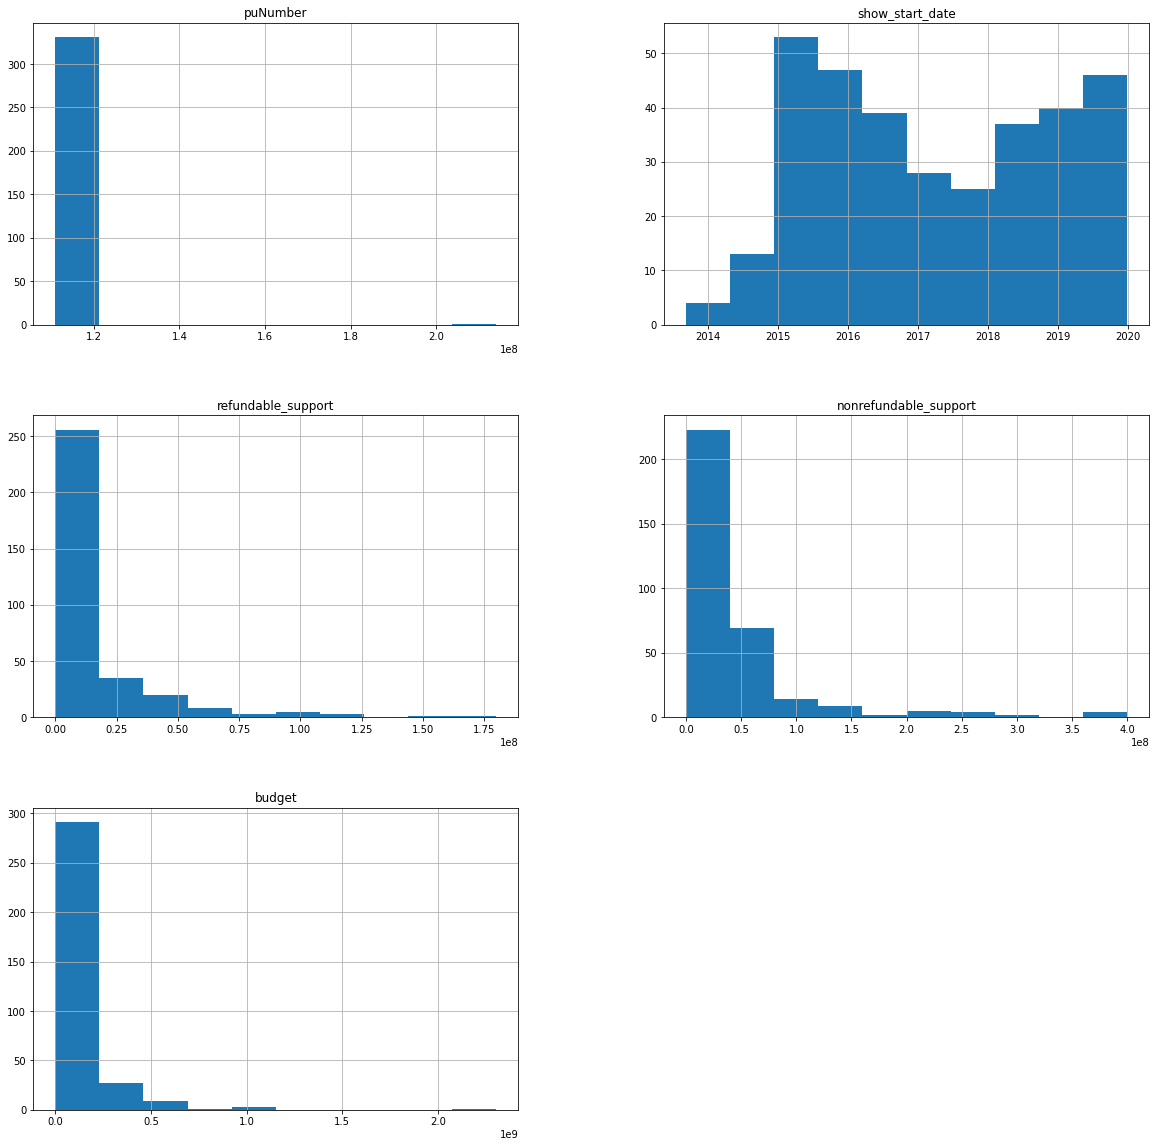

In [21]:
data_finance = data.loc[data['financing_source'] != 'Другой']
display(data_finance.head())
data_finance.hist(figsize=(20, 20))

<div class="alert alert-info">
<b> Приведены графики по количественным характеристикам (номер прокатного удостоверения, дата премьеры фильма, объём возвратных средств государственной поддержки, объём невозвратных средств государственной поддержки, бюджет) фильмов с государственной поддержкой для проверки на предмет подозрительных данных. Гистограммы ведут себя ровно, значимых выбросов не наблюдается.</b> 
</div>

In [22]:
data_finance.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"[драма, мелодрама]",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,[nan],28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"[комедия, фантастика]",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,[драма],55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,[драма],232100.0


In [23]:
data_finance['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

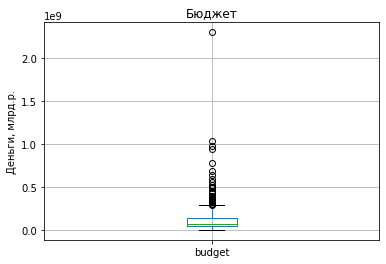

In [24]:
data_finance.boxplot(column='budget')
plt.ylabel('Деньги, млрд.р.')
plt.title('Бюджет')
plt.show()

In [25]:
data_finance.loc[data_finance['budget'] == 2305074303]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000,90000000,2305074303,Фонд кино,5.8,"[приключения, фэнтези]",333597059.59


In [26]:
data_finance['refundable_support'].describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

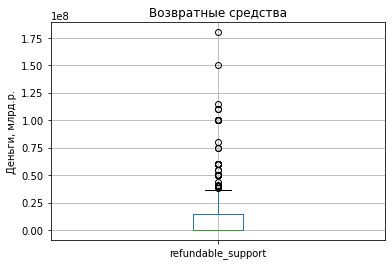

In [27]:
data_finance.boxplot(column='refundable_support')
plt.ylabel('Деньги, млрд.р.')
plt.title('Возвратные средства')
plt.show()

In [28]:
data_finance['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

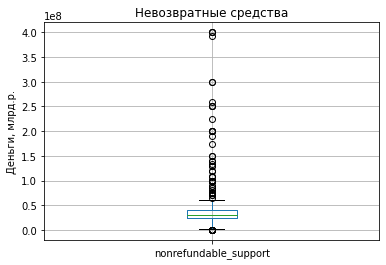

In [29]:
data_finance.boxplot(column='nonrefundable_support')
plt.ylabel('Деньги, млрд.р.')
plt.title('Невозвратные средства')
plt.show()

<div class="alert alert-info">
<b> Столбец "бюджет" включает в себя сумму возвратной и невозвратной господдержек, вследствие чего все эти графики ведут себя схожим образом. Из аномальных значений можно отметить бюджет одного фильма в 2305074303 денежных единиц.</b> 
</div>

In [30]:
data['support'] = data['refundable_support'] + data['nonrefundable_support']
display(data.query('budget < support'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.6,[мелодрама],10234016.1,23000000
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.6,[драма],446163511.0,75000000
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.8,"[боевик, драма, криминал]",196572438.4,80000000
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.2,"[комедия, фэнтези]",67418974.8,20000000
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.6,"[мультфильм, приключения, фэнтези]",184487551.4,160000000
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.3,"[комедия, драма]",1957738.51,59000000
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.1,"[комедия, мелодрама]",72937783.2,35000000
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.3,[комедия],15362931.43,6000000
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.3,"[комедия, мелодрама]",70299052.0,70000000
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.6,[фантастика],1038321489.0,250000000


<div class="alert alert-info">
<b> Целых 17 фильмов, при съемках которых не были в полном размере освоены средства господдержки! Кажется, речь идет о мошенничестве!</b> 
</div>

In [31]:
data.drop(data.loc[data['budget'] < data['support']].index, axis=0)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Другой,7.2,"[боевик, драма, мелодрама]",NaN,0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Другой,«6+» - для детей старше 6 лет,0,0,0,Другой,6.6,"[драма, военный]",NaN,0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"[фантастика, боевик, триллер]",NaN,0
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"[фантастика, боевик, триллер]",NaN,0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,Другой,6.8,"[фантастика, боевик, триллер]",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0,0,0,Другой,NaN,[nan],NaN,0
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0,0,0,Другой,5.4,"[боевик, триллер]",NaN,0
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0,0,0,Другой,NaN,[nan],NaN,0
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0,0,0,Другой,NaN,[nan],NaN,0


<div class="alert alert-info">
<b> Столбец "бюджет" включает в себя полный объем государственной поддержки плюс частные средства (от продюсеров и т.д.). Заполнить нулевые значения здесь нечем, строки, где бюджет меньше поддержки, удалены.</b> 
</div>

In [32]:
data['year'] = data['show_start_date'].dt.year

In [33]:
def first_element(row):
    row['head_director'] = row['director'].split(',')[0]
    row['head_genre'] = row['genres'][0] #.split(',')
    return row
data = data.apply(first_element, axis=1)
data.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,year,head_director,head_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,Другой,7.2,"[боевик, драма, мелодрама]",NaN,0,2015,Кевин Костнер,боевик


In [34]:
data['support_part'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,year,head_director,head_genre,support_part
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,...,0,Другой,7.2,"[боевик, драма, мелодрама]",NaN,0,2015,Кевин Костнер,боевик,NaN


<div class="alert alert-info">
<b> В датасет добавлены новые столбцы для дальнейшего анализа: с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма.</b> 
</div>

### Исследовательский анализ данных


In [35]:
data['year'].unique()

array([2015, 2016, 2013, 2014, 2012, 2017, 2010, 2011, 2018, 2019])

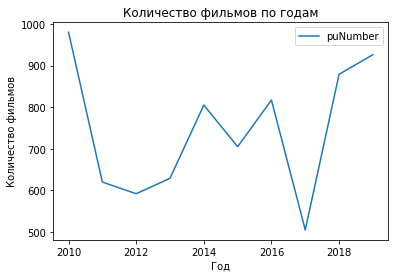

In [36]:
data.pivot_table(index = 'year', values = 'puNumber', aggfunc = 'count').plot()
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.title('Количество фильмов по годам')
plt.show()

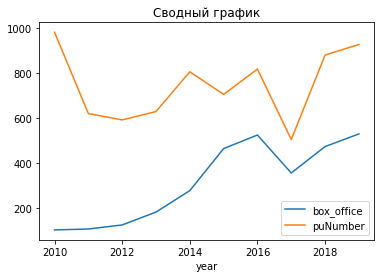

In [37]:
data.pivot_table(index = 'year', values = ['box_office', 'puNumber'], aggfunc = 'count').plot()
plt.title('Сводный график')
plt.show()

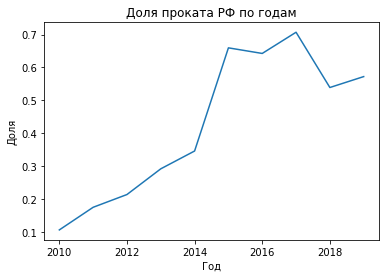

In [38]:
rental_share = data.groupby('year')['box_office'].count() / data.groupby('year')['puNumber'].count()
rental_share.plot()
plt.ylabel('Доля')
plt.xlabel('Год')
plt.title('Доля проката РФ по годам')
plt.show()

<div class="alert alert-info">
<b> Начиная с 2010 данные показывают рост количества фильмов с указанной информацией о прокате. С 2015 года видим, что доля таких фильмов составляет более половины от всех выходивших в прокат картин. Получаем, что полнее всего представлен период с 2015 по 2019. Самым кассовым был 2017 год.</b> 
</div>

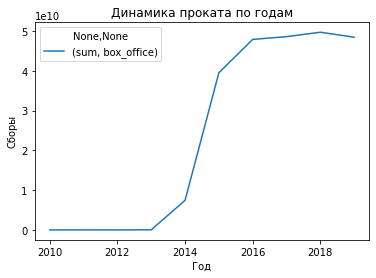

In [39]:
data.pivot_table(index='year', values='box_office', aggfunc=['sum']).plot()
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.title('Динамика проката по годам')
plt.show()

<div class="alert alert-info">
<b> Минимальная сумма сборов - в 2010, что ожидаемо (меньше фильмов в прокате). Максимальная сумма - в 2018 году.</b> 
</div>

In [40]:
data.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.441790e+04,5560.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.117353e+07,3915041.020
2017,1.360328e+08,9968340.000


<div class="alert alert-info">
<b> Подтверждаем гипотезу о том, что с 2010 по 2014 доля фильмов с указанной информацией о прокате минимальна и объективному анализу не подлежит. Наблюдаем разницу в несколько порядков между средними и медианными значениями сборов до 2015, что может быть связано с #(недостаточной информацией о прокате по этим годам) тем, что сумма кассовых сборов с 2015 года горазда больше.</b> 
</div>

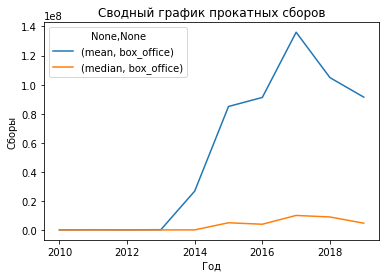

In [41]:
data.pivot_table(index='year', values='box_office', aggfunc=['mean','median']).plot()
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.title('Сводный график прокатных сборов')
plt.show()

In [42]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [43]:
data_final = data.query('year == [2015, 2016, 2017, 2018, 2019]')
data_final.pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'count'])

,mean,count
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,8.987588e+06,90
«12+» - для детей старше 12 лет,1.746957e+08,347
«16+» - для детей старше 16 лет,9.445309e+07,805
«18+» - запрещено для детей,5.146416e+07,792
«6+» - для детей старше 6 лет,1.760209e+08,317


<div class="alert alert-info">
<b> Суммарно за пять лет видим, что возрастное ограничение аудитории влияет на сборы фильма в прокате. В прокате лидируют фильмы для детей (категории 6+ и 12+), минимальные сборы - у картин для любой зрительской аудитории.</b> 
</div>

In [44]:
data.query('year == 2015').pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'count'])

,mean,count
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,9.719348e+06,39
«12+» - для детей старше 12 лет,1.865217e+08,73
«16+» - для детей старше 16 лет,6.766739e+07,168
«18+» - запрещено для детей,4.115385e+07,132
«6+» - для детей старше 6 лет,1.641849e+08,53


In [45]:
data.query('year == 2016').pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'count'])

,mean,count
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,3.750858e+06,40
«12+» - для детей старше 12 лет,1.488347e+08,82
«16+» - для детей старше 16 лет,9.156345e+07,182
«18+» - запрещено для детей,4.499291e+07,151
«6+» - для детей старше 6 лет,1.721878e+08,70


In [46]:
data.query('year == 2017').pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'count'])

,mean,count
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,7.653298e+07,3
«12+» - для детей старше 12 лет,1.914982e+08,41
«16+» - для детей старше 16 лет,1.549177e+08,121
«18+» - запрещено для детей,6.565643e+07,147
«6+» - для детей старше 6 лет,2.685809e+08,45


In [47]:
data.query('year == 2018').pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'count'])

,mean,count
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,6.489800e+06,5
«12+» - для детей старше 12 лет,2.161705e+08,66
«16+» - для детей старше 16 лет,1.057923e+08,156
«18+» - запрещено для детей,4.893903e+07,179
«6+» - для детей старше 6 лет,1.486026e+08,68


In [48]:
data.query('year == 2019').pivot_table(index='age_restriction', values='box_office', aggfunc=['mean', 'count'])

,mean,count
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,5.915356e+06,3
«12+» - для детей старше 12 лет,1.491788e+08,85
«16+» - для детей старше 16 лет,7.164842e+07,178
«18+» - запрещено для детей,5.531036e+07,183
«6+» - для детей старше 6 лет,1.586734e+08,81


<div class="alert alert-info">
<b> Картина не меняется в зависимости от года. Единственное отличие - в том, что фильмов в категории "0+" с годами стало появляться в прокате меньше, вероятно, из-за сниженных кассовых сборов по сравнению с другими категориями фильмов.</b> 
</div>

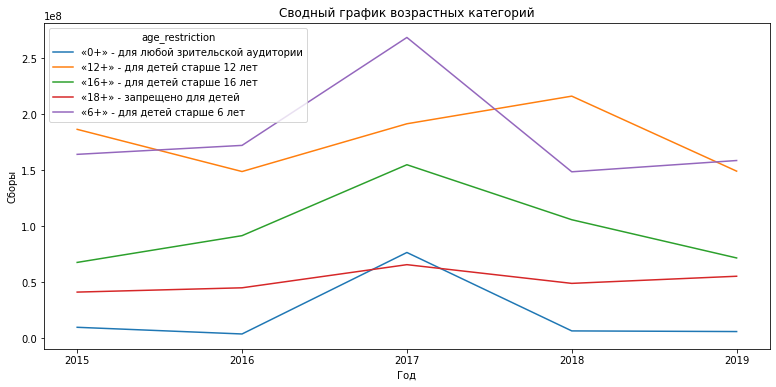

In [49]:
data.query('year == [2015, 2016, 2017, 2018, 2019]').pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='mean').plot(figsize=(13,6))
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.xticks(np.arange(min(data['year'])+5, max(data['year'])+1, 1.0))
plt.title('Сводный график возрастных категорий')
plt.show()

<div class="alert alert-info">
<b> Рассмотрели, сколько фильмов выходило в прокат каждый год всего и в отечественном прокате. Прокат фильмов в РФ признан годным для анализа с 2015 года.
    Рассчитали среднюю и медианную сумму сборов для каждого года вкачестве доказательства.
    Определили, что возрастное ограничение аудитории влияет на сборы фильма в прокате. Категории 6+ и 12+ собрали больше всего денег в прокате ежегодно. </b> 
</div

### Исследование фильмов, получивших государственную поддержку

In [50]:
data_finance = data.query('financing_source != "Другой"')
display(data_finance)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,year,head_director,head_genre,support_part
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,...,79411900,Министерство культуры,8.1,"[драма, мелодрама]",3.653536e+05,26500000,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,...,37142857,Министерство культуры,NaN,[nan],2.814000e+04,26000000,2014,А.Якимчук,nan,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,...,176023490,Фонд кино,5.3,"[комедия, фантастика]",1.995703e+07,107847945,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,...,40574140,Министерство культуры,4.2,[драма],5.591750e+04,28000000,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,...,40015122,Министерство культуры,6.4,[драма],2.321000e+05,25000000,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,...,980000000,Фонд кино,6.0,"[история, биография, драма]",7.177032e+08,500000000,2019,А.Кравчук,история,0.510204
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,...,190000000,Фонд кино,6.7,"[мультфильм, приключения, семейный]",5.010692e+08,100000000,2019,Д.Шмидт,мультфильм,0.526316
7473,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,...,944000000,Фонд кино,5.7,"[фантастика, боевик]",NaN,500000000,2019,Ф.Бондарчук,фантастика,0.529661
7475,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,...,46154000,Министерство культуры,5.9,[драма],NaN,30000000,2019,И.Северов,драма,0.649998


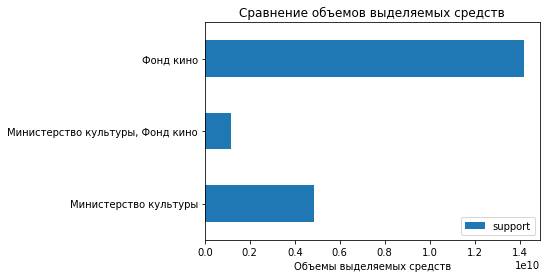

In [51]:
data_finance.pivot_table(index='financing_source', values='support', aggfunc='sum').plot(kind='barh')
plt.ylabel('')
plt.xlabel('Объемы выделяемых средств')
plt.title('Сравнение объемов выделяемых средств')
plt.show()

<div class="alert alert-info">
<b> Фонд кино спонсирует выходяще кинокартины в большем объеме, чем минкульт. Совместно органы спонсируют в минимальном объеме
   .</b> 
</div>

In [52]:
data_finance['head_director'].value_counts()

Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
Н.Хомерики       3
Д.Шмидт          3
                ..
А.Амиров         1
Д.Суворов        1
М.Михайлова      1
Ю.Быков          1
И.Учитель        1
Name: head_director, Length: 270, dtype: int64

In [53]:
data_finance.groupby(['head_director', 'ratings']).agg('mean').sort_values(by='ratings', ascending=False).head(20)

,,puNumber,refundable_support,nonrefundable_support,budget,box_office,support,year,support_part
head_director,ratings,,,,,,,,
Ю.Кара,94%,111003415.0,0.0,10000000.0,4.000000e+07,3.347500e+05,10000000.0,2015.0,0.250000
Н.Степанова при участии С.Иванова,90%,111019615.0,0.0,4700000.0,1.446246e+07,8.013700e+05,4700000.0,2015.0,0.324979
Р.Давлетьяров,8.5,111002915.0,50000000.0,100000000.0,2.205884e+08,2.491668e+08,150000000.0,2015.0,0.680000
В.Тодоровский,8.5,111017416.0,10000000.0,200000000.0,3.200000e+08,2.285782e+08,210000000.0,2016.0,0.656250
Р.Прыгунов,8.2,111006719.0,0.0,140000000.0,2.400413e+08,4.086467e+08,140000000.0,2019.0,0.583233
А.Атанесян,8.1,111005313.0,0.0,26500000.0,7.941190e+07,3.653536e+05,26500000.0,2013.0,0.333703
А.Попова,8.0,112004619.0,0.0,3000000.0,3.300000e+07,NaN,3000000.0,2019.0,0.090909
К.Худяков,8.0,111001617.0,7346881.0,30000000.0,6.317000e+07,4.100580e+05,37346881.0,2017.0,0.591212
Р.Давлетьяров,7.9,111004215.0,0.0,97000000.0,1.563607e+08,1.274840e+07,97000000.0,2015.0,0.620361


<div class="alert alert-info">
<b> Можно заметить, что среди режиссеров с самым высоким средним рейтингом фильмов (среди господдерживаемых) есть не только мастера одной картины. Например, Р.Давлетьяров и С.Андреасян, снявшие 5 и 4 фильма соответственно.

In [54]:
leaders = data_finance.query('head_director == ["Р.Давлетьяров", "С.Андреасян"]')
leaders['box_office'] / leaders['budget']

1498    0.113377
1869    1.129555
2481    0.081532
2722    0.057791
3461    0.810688
3480    0.911217
6177    4.767206
6921    0.103417
7267    0.474949
dtype: float64

<div class="alert alert-info">
<b> Даже у лучших режиссеров из 9 фильмов только один окупился с лихвой, еще один окупился на 120%, а все остальные провалились в прокате.

/tmp/ipykernel_130/4066699040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_finance['ratings'] = pd.to_numeric(data_finance['ratings'], errors='coerce')


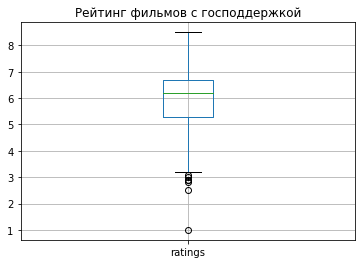

In [55]:
data_finance['ratings'] = pd.to_numeric(data_finance['ratings'], errors='coerce')
data_finance.boxplot(column='ratings')
plt.title('Рейтинг фильмов с господдержкой')
plt.show()

<div class="alert alert-info">
<b> Вцелом, рейтинг у фильмов с господдержкой не очень, шесть с небольшим. Выбросы присутствуют, но все в меньшую сторону (3 и ниже). Будучи пользователем Кинопоиска, могу сказать, что это не популярные фильмы.</b> 
</div>

In [56]:
data_finance['production_country'].value_counts()

Россия                                        316
Россия, Италия                                  2
Россия, Германия                                2
Россия - Грузия                                 1
Россия-Китай                                    1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия, Украина, Польша                         1
Россия-Словакия-Чехия                           1
Россия, Латвия, Чешская Республика              1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Сербия                                  1
Россия, Франция, Латвия                         1
Россия-Украина                                  1
Россия, Бельгия, Финляндия                      1
Name: production_country, dtype: int64

<div class="alert alert-info">
<b> Удивительно, что Минкульт и ФК в превалирующем объёме выделяют средства на производство отечественных фильмов. В топе зарубежных стран Германия и Италия. Кстати, - ни одного фильма совместно с США)</b> 
</div>

### Общий вывод:

<div class="alert alert-info">
<b> Нами изучен рынок российского кинопроката за 2010 - 2019 годы. Исходные данные от заказчика:
— название фильма;
— номер прокатного удостоверения;
— дата премьеры фильма;
— тип фильма;
— студия-производитель;
— страна-производитель;
— режиссёр;
— продюсер;
— возрастная категория;
— объём возвратных средств государственной поддержки;
— объём невозвратных средств государственной поддержки;
— источник государственного финансирования;
— общий бюджет фильма;
— рейтинг фильма на КиноПоиске;
— жанр фильма;
— сборы в рублях.    
Данные характеризуются неполнотой, более 25% пропусков. Для начала был произведен отсев пропущенных и аномальных значений, удаление пропусков данных и обработка дубликатов. В некоторых данных наличие пропусков оценено как должное. 
    Исходя из полученных данных, выявлено: 
    1. К оценке представлены данные о кинопрокате за десять лет (2010-2019). Количество выходивших в прокат фильмов со временем увеличивается, пригодными для анализа считаем данные начиная с 2015 года. Максимальная сумма кассовых сборов - в 2018 году. На сборы фильма в прокате влияет возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.): самые кассовые - фильмы для детей («6+», «12+»), наименее кассовые - с категорией «0+».  
    2. Отдельно изучены фильмы с государственной поддержкой. Их менее 5% от всего количества кинокартин. Выявлено, что бОльшие объемы спонсирования кинокартин у Фонда кино. Проанализированы фильмы топ-режиссеров, на счету которых несколько картин с господдержкой, рейтинги их фильмов - высокие (8,5 и 7,6). Несмотря на это фильмы с господдержкой характеризуются неокупаемостью в прокате (около 20%) и средним рейтингом "Кинопоиска" 6,2. С точки зрения проката в кинотеатрах это провальные кинокартины. Также выявлено, что Минкульт и ФК неохотно спонсируют  международные проекты.